In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
life = pd.read_csv("/Users/elizabethclick/Downloads/Life Expectancy Data.csv")
print(life.head())
print(life.info())
life.describe()

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [126]:
life.columns = life.columns.str.lower()
life.columns = life.columns.str.replace("\r","")
life.columns = life.columns.str.replace("\n","")
life.columns = life.columns.str.replace("-", "_")
life.columns = life.columns.str.replace("/", "_")
life.columns = life.columns.str.replace(" ", "")
life.rename(columns = {'lifeexpectancy' : "life_exp",
             'adultmortality' : "adult_mort",
             'infantdeaths' : "inf_deaths", 
             'percentageexpenditure' : "spend_rate",
             'hepatitisb' : "hep_b",
             'under_fivedeaths' : "sub5_deaths",
             'totalexpenditure' : "spend_total",
             'incomecompositionofresources' : "income_comp_resources"
            }, inplace = True)
#economic: gdp per person
life["gdp_rate"] = life["gdp"] / life["population"] 
print(life.head())

       country  year      status  life_exp  adult_mort  inf_deaths  alcohol  \
0  Afghanistan  2015  Developing      65.0       263.0          62     0.01   
1  Afghanistan  2014  Developing      59.9       271.0          64     0.01   
2  Afghanistan  2013  Developing      59.9       268.0          66     0.01   
3  Afghanistan  2012  Developing      59.5       272.0          69     0.01   
4  Afghanistan  2011  Developing      59.2       275.0          71     0.01   

   spend_rate  hep_b  measles  ...  spend_total  diphtheria  hiv_aids  \
0   71.279624   65.0     1154  ...         8.16        65.0       0.1   
1   73.523582   62.0      492  ...         8.18        62.0       0.1   
2   73.219243   64.0      430  ...         8.13        64.0       0.1   
3   78.184215   67.0     2787  ...         8.52        67.0       0.1   
4    7.097109   68.0     3013  ...         7.87        68.0       0.1   

          gdp  population  thinness1_19years  thinness5_9years  \
0  584.259210  33736

In [106]:
#Show keys
life.info()
life=life.fillna(life.mean())
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                2938 non-null   object 
 1   year                   2938 non-null   int64  
 2   status                 2938 non-null   object 
 3   life_exp               2928 non-null   float64
 4   adult_mort             2928 non-null   float64
 5   inf_deaths             2938 non-null   int64  
 6   alcohol                2744 non-null   float64
 7   spend_rate             2938 non-null   float64
 8   hep_b                  2385 non-null   float64
 9   measles                2938 non-null   int64  
 10  bmi                    2904 non-null   float64
 11  sub5_deaths            2938 non-null   int64  
 12  polio                  2919 non-null   float64
 13  spend_total            2712 non-null   float64
 14  diphtheria             2919 non-null   float64
 15  hiv_

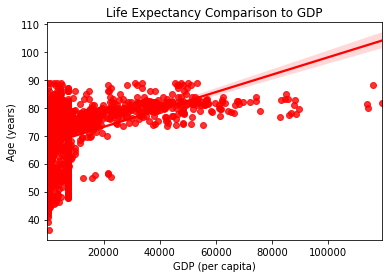

<Figure size 432x288 with 0 Axes>

In [124]:
#plot life_exp as function of gdp
sns.regplot(x="gdp", y="life_exp", color = "red", data=life)
plt.title("Life Expectancy Comparison to GDP")
plt.xlabel("GDP (per capita)")
plt.ylabel("Age (years)")
plt.show()
plt.clf()

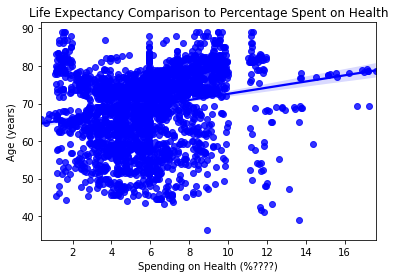

<function matplotlib.pyplot.clf()>

In [129]:
#plot life_exp by health spending rate : BAD DATA ; SEE life.describe() chunk; 
#original csv mixed up spend_percentage column with spend_total column
sns.regplot(x="spend_total", y="life_exp", color = "blue", data=life)
plt.title("Life Expectancy Comparison to Percentage Spent on Health")
plt.xlabel("Spending on Health (%)")
plt.ylabel("Age (years)")
plt.show()
plt.clf

In [ ]:
#These two plots indicate that gdp per capita may be a stronger factor than health spending percentage
# in life expectancy; suggests throwing money at "health"may be missing other factors that go along with better gdp

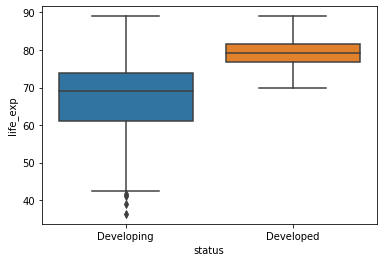

In [109]:
#show spread between developed and not developed countries
sns.boxplot(x="status",
 y="life_exp",
 data=life)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '2000'),
  Text(1, 0, '2001'),
  Text(2, 0, '2002'),
  Text(3, 0, '2003'),
  Text(4, 0, '2004'),
  Text(5, 0, '2005'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007'),
  Text(8, 0, '2008'),
  Text(9, 0, '2009'),
  Text(10, 0, '2010'),
  Text(11, 0, '2011'),
  Text(12, 0, '2012'),
  Text(13, 0, '2013'),
  Text(14, 0, '2014'),
  Text(15, 0, '2015')])

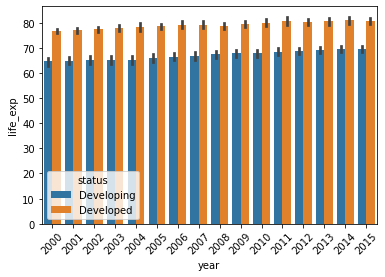

In [110]:
#compare developed and non-developed life expectancy by year
sns.barplot(x="year", y="life_exp", hue = "status", data=life)
plt.xticks(rotation = 45)


(array([  4.,  50., 134., 229., 277., 405., 590., 819., 362.,  68.]),
 array([36.3 , 41.57, 46.84, 52.11, 57.38, 62.65, 67.92, 73.19, 78.46,
        83.73, 89.  ]),
 <BarContainer object of 10 artists>)

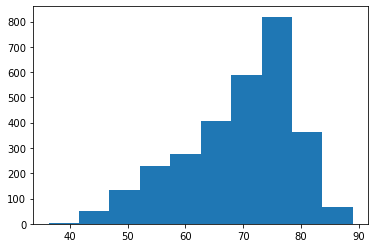

In [111]:
plt.hist(x = "life_exp", data = life)
#distribution of life_expectancy data skews to the right

In [112]:
#disease per 100,000

#life["hep_b_rate"] = life["hep_b"] / life["population"] * 1000   immunization
#life['measles_rate'] = life["measles"] / life["population"] * 1000   already number per 1000 population
#life["polio_rate"] = life["polio"] / life["population"] * 1000     immunization
#life["diphtheria_rate"] = life["diphtheria"] / life["population"] * 1000 immunization
#life["hiv_aids_rate"] = life["hiv_aids"] / life["population"] * 1000 deaths 0-4 per 1000 population



#economic: gdp per person
life["gdp_rate"] = life["gdp"] / life["population"] 

#drop other columns at beginning?

In [113]:
#NONPARAMETRIC ESTIMATION OF MEAN, MEDIAN AND STANDARD DEVIATION: USING BOOTSTRAPPING
#make column of interest into array for easier indexing

life_arr = np.array(life["life_exp"])

#generate random numbers from 0 to 2937 for our row index from a uniform distribution
rand_index = np.random.randint(low=0, high=2397, size=300)

#sample column of interest using the randomized indexes
original_sample = []
x = -1
length = len(rand_index) - 1
while x < length :
    x=x+1
    new_entry = life_arr[rand_index[x]]
    original_sample.append(new_entry)
    
original_sample = np.array(original_sample)    
print(original_sample.mean())
print(np.median(original_sample), " is the original sample median")
print(np.std(original_sample))


68.78283287795993
72.3  is the original sample median
10.130882278272605


In [114]:
means_boot_samples = []
median_boot_samples = []
std_boot_samples = []

for i in range(1000):
                boot_sample = np.random.choice(original_sample, 100)
                means_boot_samples.append(boot_sample.mean())
                median_boot_samples.append(np.median(boot_sample))
                std_boot_samples.append(np.std(boot_sample))
            
        
print(np.mean(means_boot_samples))
print(np.mean(median_boot_samples), " is the bootstrapping median")
print(np.mean(std_boot_samples))


68.7660065273224
71.96018630464481  is the bootstrapping median
10.047549786579935


In [115]:
conf_int1 = np.percentile(means_boot_samples, [2.5, 97.5]) # The middle 95% interval
print(conf_int1)
conf_int2 = np.percentile(median_boot_samples, [2.5, 97.5]) # The middle 95% interval
print(conf_int2)
conf_int3 = np.percentile(std_boot_samples, [2.5, 97.5]) # The middle 95% interval
print(conf_int3)


[66.7253   70.759525]
[68.74875 73.4    ]
[ 8.71264196 11.34159694]


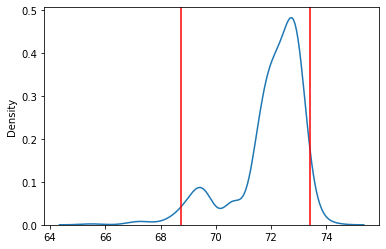

In [116]:
import seaborn as sns
sns.kdeplot(median_boot_samples)
for endpoint in conf_int2:
    plt.axvline(endpoint, color='red')
plt.show()


In [117]:
#ANOTHER PYTHON METHOD OF BOOTSTRAPPING FOR ESTIMATION OF SAME STATISTICS
from sklearn.utils import resample
means_boot_samples = []
median_boot_samples = []
std_boot_samples = []

for i in range(1000):
                boot_sample = resample(original_sample)
                means_boot_samples.append(boot_sample.mean())
                median_boot_samples.append(np.median(boot_sample))
                std_boot_samples.append(np.std(boot_sample))
        
print(np.mean(means_boot_samples))
print(np.mean(median_boot_samples), " is the bootstrapping median, using sklearn library")
print(np.mean(std_boot_samples))

68.79278653005464
72.23468739754098  is the bootstrapping median, using sklearn library
10.096557266851603
